<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2.1 Probability Axioms**
**Probability axioms** are fundamental rules that form the basis of probability theory. There are a couple key definitions that are useful in providing context:
1.   **Probability**: This is the branch of mathematics that deals with the likelihood of an event happening and is often used to quantify uncertainty in data analysis and data science.
2.   **Experiment**: In the context of probability, this is any process whose outcome is subject to undercertainty.
3.   **Sample Set**: This is the set of all possible outcomes within an experiment.
4.   **Event**: This is any collection, or subset, of outcomes contained in the sample set of an experiment.


There are three main axioms in probability:
1.   **Non-Negativity Axiom**

  For any event *A*, 1≥ *P*(*A*) ≥ 0
2.   **Normalization Axiom**

  *P(S)*=1

3.   **Additivity Axiom**

  If two events *A1* and *A2* are mutually exclusive, then the probability of their union is the sum of their individual probabilities. Thus, if *A1, A2, A3*,... is an infinite collection of disjoint events, then:
  
  
  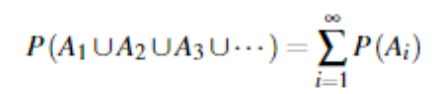





The code below demonstrates these axioms when rolling a six-sided die.

In [2]:

# Rolling a six sided die
sample_space = [1, 2, 3, 4, 5, 6]

# Event A is rolling an even number
event_A = [2, 4, 6]

# Event B is rolling a number greater than 4
event_B = [5, 6]

# Event C is rolling a number less than 1
event_C = []

# calculates probability
def probability(event, sample_space):
    return len(event) / len(sample_space)


# Axiom 1
prob_A = probability(event_A, sample_space)
prob_C= probability(event_C, sample_space)
print(f"Axiom 1: Non-Negativity")
print(f"Probability of rolling an even number: {prob_A}")
print(f"Impossible Event-Probability of rolling a number less than 1: {prob_C}")

# Axiom 2
prob_sample_space = probability(sample_space, sample_space)
print(f"Axiom 2: Normalization")
print(f"Probability of the entire sample space: {prob_sample_space}")

# Axiom 3
event_D = [2, 4]  # rolling even number less than 5
event_E = [6]     # rolling a 6

prob_D = probability(event_D, sample_space)
prob_E = probability(event_E, sample_space)
prob_D_union_E = prob_D + prob_E
print(f"Axiom 3: Additivity")
print(f"Probability of rolling an even number less than 5: {prob_D}")
print(f"Probability of rolling a 6: {prob_E}")
print(f"Probability of the union of these two mutually exclusive events: {prob_D_union_E}")




Axiom 1: Non-Negativity
Probability of rolling an even number: 0.5
Impossible Event-Probability of rolling a number less than 1: 0.0
Axiom 2: Normalization
Probability of the entire sample space: 1.0
Axiom 3: Additivity
Probability of rolling an even number less than 5: 0.3333333333333333
Probability of rolling a 6: 0.16666666666666666
Probability of the union of these two mutually exclusive events: 0.5


# **2.2.2 Conditional Probability**
**Conditional probability** is the likelihood of an event or outcome occuring based on the occurrence of a previous event or outcome. It is expressed as a ratio of unconditional probabilities. In the case of event *A* given event *B*:
*   **Numerator**: Probability of the intersection of the events.
*   **Denominator**: Probability of event *B*.

This is given by the equation

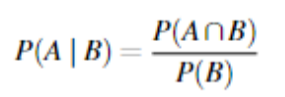

Conditional probability gave rise to the multiplication rule

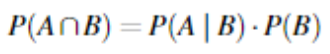

The code below demonstrates conditional probability using a deck of cards.

In [17]:

deck = {
    'face_cards': ['J', 'Q', 'K'] * 4,  #face cards
    'ace_cards': ['A'] * 4,  # ace cards
    'non_face_cards': list(range(2, 11)) * 4  # numbered cards
}

# drawing a queen
event_A = ['Q'] * 4

# drawing a face card
event_B = deck['face_cards']

total_cards = len(deck['face_cards']) + len(deck['non_face_cards']) + len(deck['ace_cards'])

# calculate probability
def probability(event, total):
    return len(event) / total

# probability of drawing a queen
P_A = probability(event_A, total_cards)

# probability of drawing a face card
P_B = probability(event_B, total_cards)

# probability of drawing a queen given that you drew a face card
P_A_and_B = probability(event_A, len(event_B))
P_A_given_B = P_A_and_B / P_B

# Output the results
print(f"Probability of drawing a Queen: {P_A:.2f}")
print(f"Probability of drawing a face card: {P_B:.2f}")
print(f"Probability of drawing a Queen given it's a face card: {P_A_given_B:.2f}")


Probability of drawing a Queen: 0.08
Probability of drawing a face card: 0.23
Probability of drawing a Queen given it's a face card: 1.44


# **2.2.3 Discrete Random Variables**
A **random variable** is a variable whose possible values are either a finite set or an infinite sequence.

A **discrete random variable** is one which can only take on a countable number of distinct values. Thus, if a random variable can take only a finite amount of distinct values, then it must be discrete.

The probabilities associated with each possible value of a discrete random variable is called the **probability distribution**. The probability distribution of a discrete random variable is defined for every number *x* by:

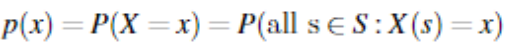



The following code demonstrates the probability distribution of rolling a six-sided die.

Outcome counts: {1: 1639, 2: 1658, 3: 1731, 4: 1619, 5: 1656, 6: 1697}
Probability Distribution: {1: 0.1639, 2: 0.1658, 3: 0.1731, 4: 0.1619, 5: 0.1656, 6: 0.1697}


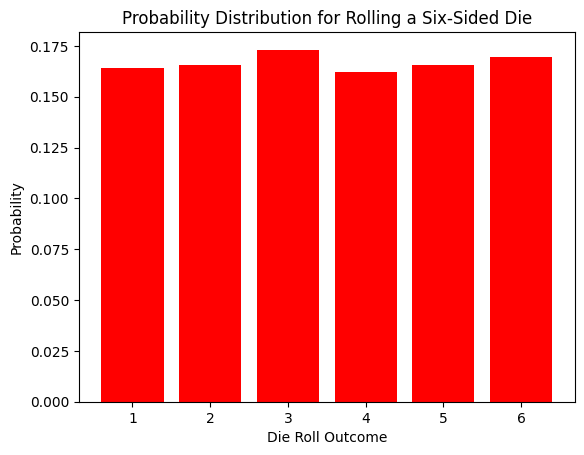

In [20]:
import random
import matplotlib.pyplot as plt

# define outcomes
outcomes = [1, 2, 3, 4, 5, 6]

# number of trials
num_rolls = 10000

rolls = [random.choice(outcomes) for _ in range(num_rolls)]
counts = {outcome: rolls.count(outcome) for outcome in outcomes}

# calculate probability distribution
pd = {outcome: counts[outcome] / num_rolls for outcome in outcomes}


print("Outcome counts:", counts)
print("Probability Distribution:", pd)
plt.bar(pd.keys(), pd.values(), color='red')
plt.xlabel('Die Roll Outcome')
plt.ylabel('Probability')
plt.title('Probability Distribution for Rolling a Six-Sided Die')
plt.show()


As you can see, the probability distribution is fairly even because all sides of the die are equally likely.

**Types of Discrete Random Variables**:
1. **Bernoulli Random Variable**: Represents the outcome of a single trial with only two outcomes, success or failure.
2. **Binomial Random Variable**: Counts the number of successes in a fixed number of independent Bernoulli trials.
3. **Geometric Random Variable**: Represents the number of trials needed to get the first success in a sequence of independent Bernoulli trials.  



# **2.2.4 Continuous Random Variables**
A random variable is continuous if both the following conditions apply:
1.   Its set of possible values consists of al numbers in a single interval on the number line.
2. *P(X=c)=0* for any possible value individual *c*.

Thus, continuous random variables take on an infinite number of possible values. Some examples include time, weight, height, temperature, etc.

The probability distribution is modeled by the function:
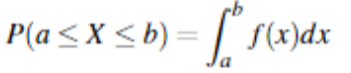

The code below simulates values from a normal distribution, visualizes the probability distribution and calculates the probability of a random variable falling within a specific interval.

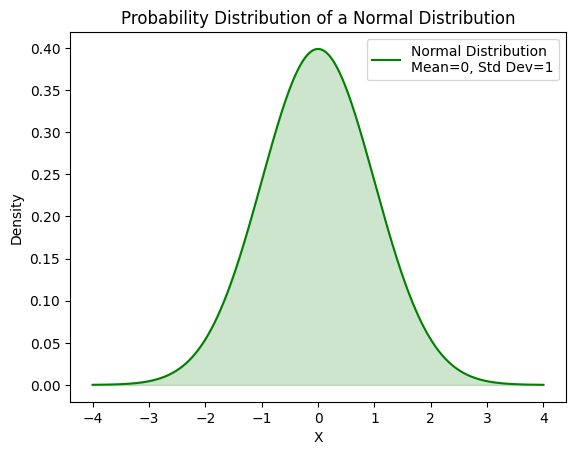

Probability of the variable falling between -1 and 1: 0.6827


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# normal distribution
mean = 0
std_dev = 1
sample_size = 10000
samples = np.random.normal(mean, std_dev, sample_size)
x_values = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# probability distribution
pd_values = norm.pdf(x_values, mean, std_dev)


plt.plot(x_values, pd_values, label=f'Normal Distribution\nMean={mean}, Std Dev={std_dev}', color='green')
plt.fill_between(x_values, pd_values, color='green', alpha=0.2)
plt.title('Probability Distribution of a Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

# probability of variable falling in interval
interval_start = -1
interval_end = 1
probability_interval = norm.cdf(interval_end, mean, std_dev) - norm.cdf(interval_start, mean, std_dev)
print(f"Probability of the variable falling between {interval_start} and {interval_end}: {probability_interval:.4f}")
